In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r'Company_Data.csv')

In [3]:
df.head(10)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
5,10.81,124,113,13,501,72,Bad,78,16,No,Yes
6,6.63,115,105,0,45,108,Medium,71,15,Yes,No
7,11.85,136,81,15,425,120,Good,67,10,Yes,Yes
8,6.54,132,110,0,108,124,Medium,76,10,No,No
9,4.69,132,113,0,131,124,Medium,76,17,No,Yes


In [4]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

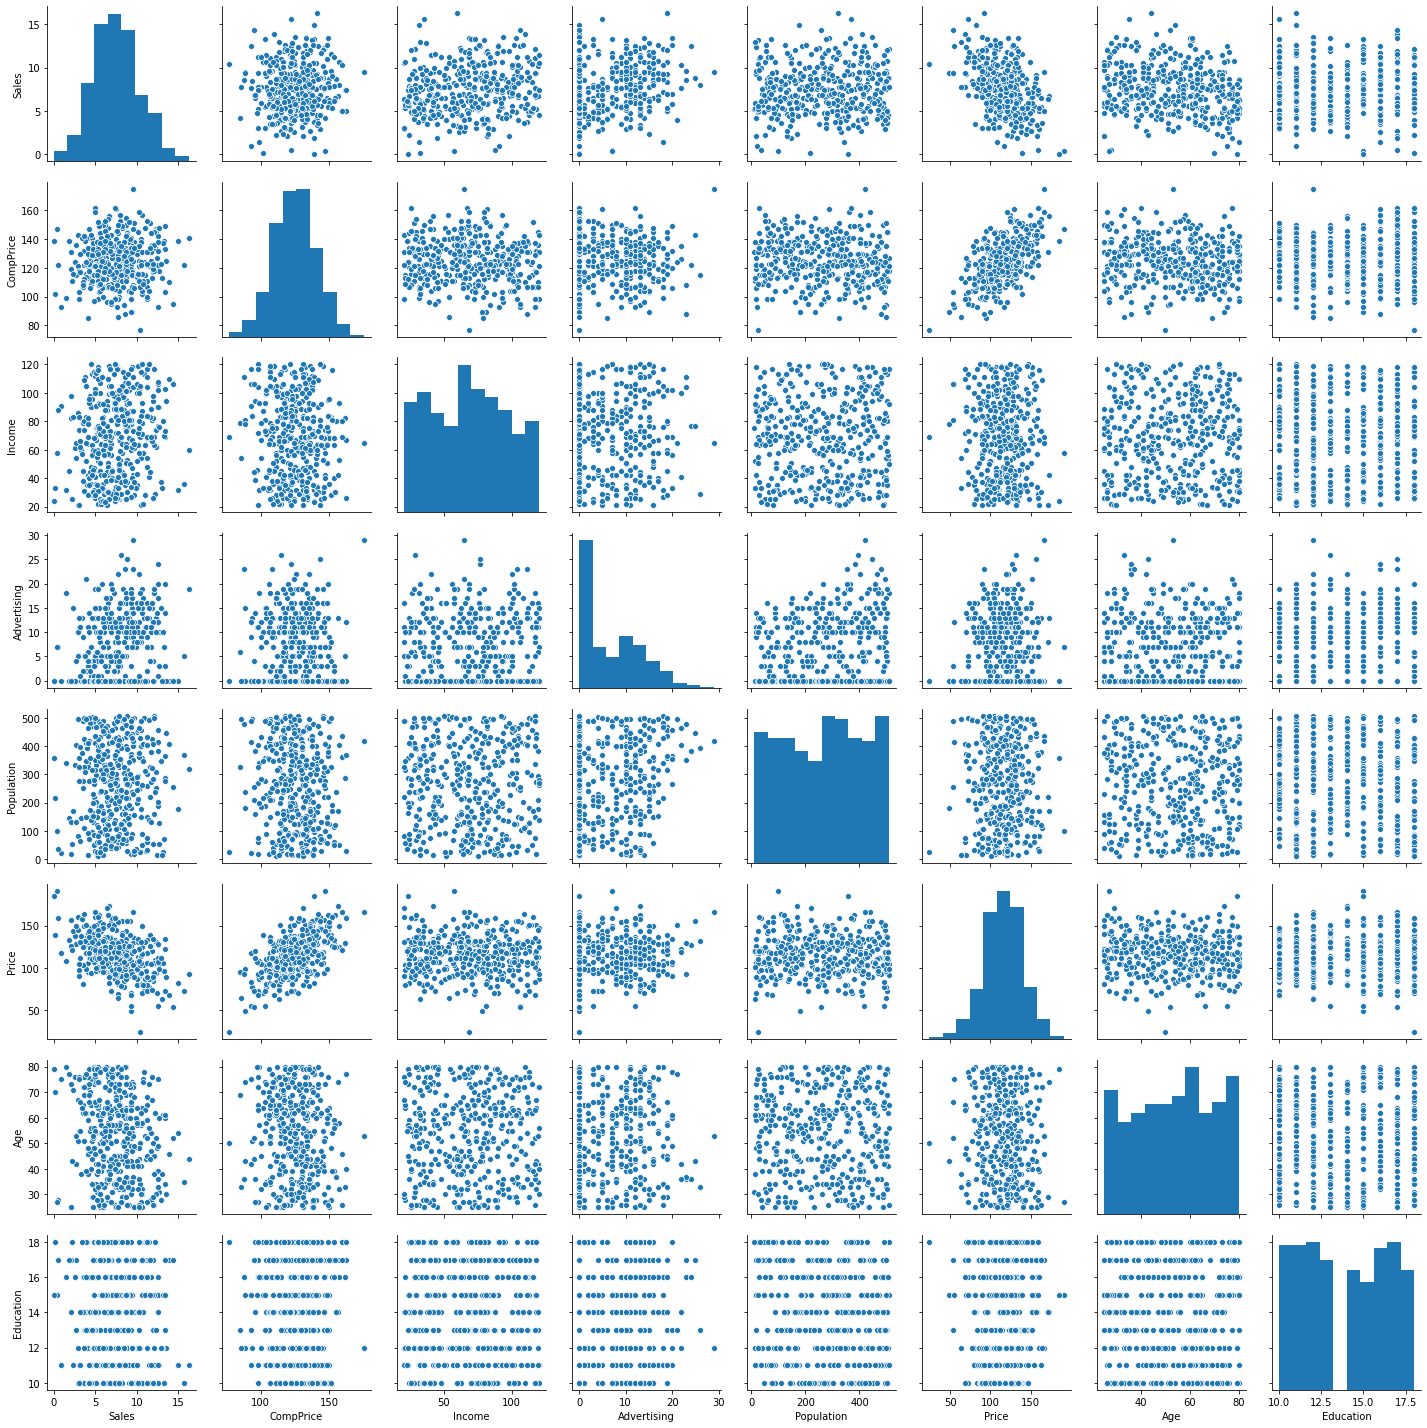

In [6]:
sns.pairplot(df)

In [7]:
df.corr()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000


In [8]:
df.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

<AxesSubplot:xlabel='Sales'>

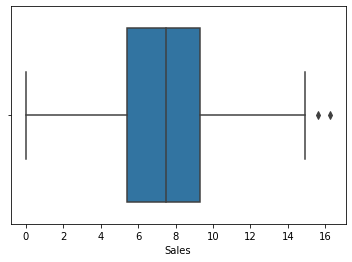

In [9]:
sns.boxplot(df.Sales )

Sales


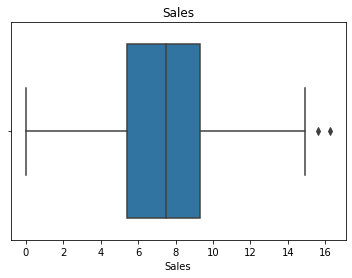

CompPrice


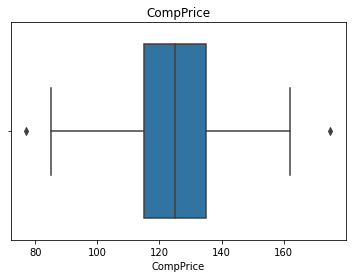

Income


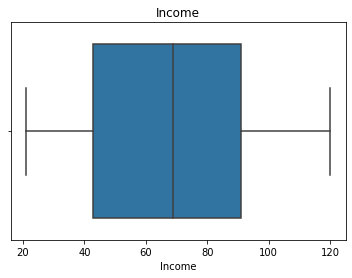

Advertising


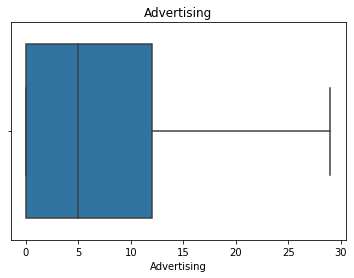

Population


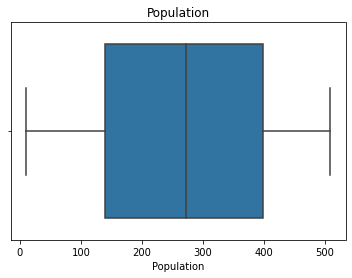

Price


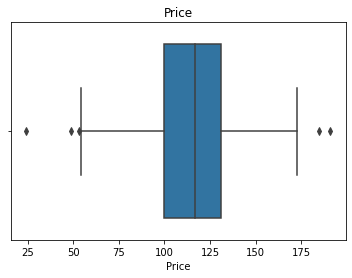

ShelveLoc


TypeError: unsupported operand type(s) for /: 'str' and 'int'

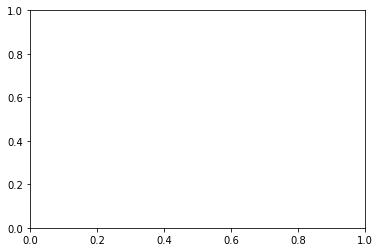

In [10]:
for i in list(df.columns):
    print(i)
    if df[i].dtype == 'float64' or 'int64':
        plt.subplot()
        sns.boxplot(df[i])
        plt.title(i)
        plt.show()

Sales


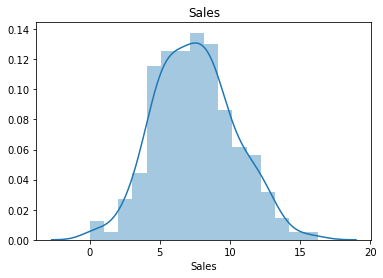

CompPrice


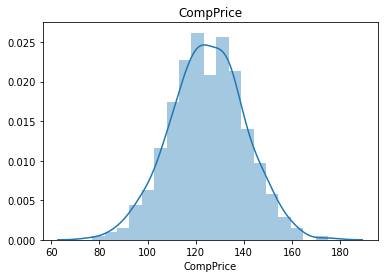

Income


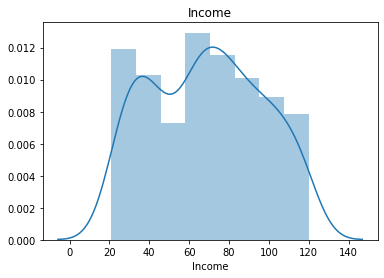

Advertising


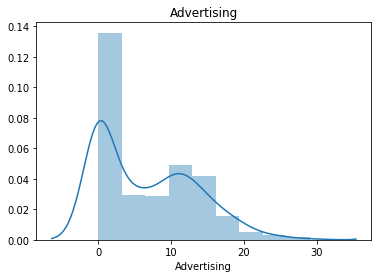

Population


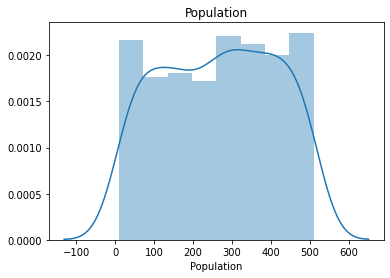

Price


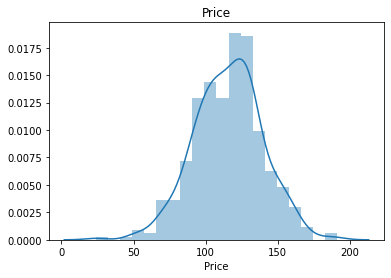

ShelveLoc


TypeError: unsupported operand type(s) for /: 'str' and 'int'

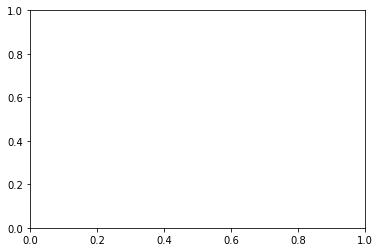

In [15]:
for i in list(df.columns):
    print(i)
    if df[i].dtype == 'float64' or 'int64':
        plt.subplot()
        sns.distplot(df[i])
        plt.title(i)
        plt.show()

In [16]:
#divide the data based on mean sales valuse 
df.Sales.mean()

7.496325

In [17]:
df_processe = df.copy()

In [18]:
df_processe.Sales = [1 if i >= df_processe.Sales.mean() else 0 for i in df_processe.Sales]


In [19]:
df_processe

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,138,73,11,276,120,Bad,42,17,Yes,Yes
1,1,111,48,16,260,83,Good,65,10,Yes,Yes
2,1,113,35,10,269,80,Medium,59,12,Yes,Yes
3,0,117,100,4,466,97,Medium,55,14,Yes,Yes
4,0,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,1,138,108,17,203,128,Good,33,14,Yes,Yes
396,0,139,23,3,37,120,Medium,55,11,No,Yes
397,0,162,26,12,368,159,Medium,40,18,Yes,Yes
398,0,100,79,7,284,95,Bad,50,12,Yes,Yes


In [20]:
df_processe = pd.get_dummies(df_processe, drop_first=True) # add dummies for cathogerical variable

In [21]:
df_processe

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes
0,1,138,73,11,276,120,42,17,0,0,1,1
1,1,111,48,16,260,83,65,10,1,0,1,1
2,1,113,35,10,269,80,59,12,0,1,1,1
3,0,117,100,4,466,97,55,14,0,1,1,1
4,0,141,64,3,340,128,38,13,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,1,138,108,17,203,128,33,14,1,0,1,1
396,0,139,23,3,37,120,55,11,0,1,0,1
397,0,162,26,12,368,159,40,18,0,1,1,1
398,0,100,79,7,284,95,50,12,0,0,1,1


In [22]:
#Dividing the data
x=df_processe.iloc[:,1:]
y = df_processe.Sales


# data cleaning i.e removing the outliers

In [23]:
from sklearn.ensemble import IsolationForest

In [24]:
# training the model
clf = IsolationForest(random_state=10,contamination=0.01)
clf.fit(df_processe)

IsolationForest(contamination=0.01, random_state=10)

In [25]:
# predictions
y_pred_outliers = clf.predict(df_processe)
y_pred_outliers

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [26]:
df_processe['anomaly']=clf.predict(df_processe.iloc[:,0:12])

In [27]:
df_processe[df_processe.anomaly== -1]

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes,anomaly
75,1,88,111,23,480,92,36,16,0,0,0,1,-1
278,0,114,113,2,129,151,40,15,1,0,0,1,-1
317,0,142,30,0,472,136,80,15,1,0,0,0,-1
347,0,96,39,0,161,112,27,14,1,0,0,0,-1


In [28]:
df_cleaned = df_processe.copy()
df_cleaned= df_cleaned.drop(df_cleaned.index[[75,278,317,347]],axis=0).reset_index()

In [29]:
df_cleaned

,index,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes,anomaly
0,0,1,138,73,11,276,120,42,17,0,0,1,1,1
1,1,1,111,48,16,260,83,65,10,1,0,1,1,1
2,2,1,113,35,10,269,80,59,12,0,1,1,1,1
3,3,0,117,100,4,466,97,55,14,0,1,1,1,1
4,4,0,141,64,3,340,128,38,13,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,395,1,138,108,17,203,128,33,14,1,0,1,1,1
392,396,0,139,23,3,37,120,55,11,0,1,0,1,1
393,397,0,162,26,12,368,159,40,18,0,1,1,1,1
394,398,0,100,79,7,284,95,50,12,0,0,1,1,1


In [30]:
#remove the extra columns
df_cleaned =df_cleaned.drop(['anomaly','index'],axis=1)

In [31]:
df_cleaned

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes
0,1,138,73,11,276,120,42,17,0,0,1,1
1,1,111,48,16,260,83,65,10,1,0,1,1
2,1,113,35,10,269,80,59,12,0,1,1,1
3,0,117,100,4,466,97,55,14,0,1,1,1
4,0,141,64,3,340,128,38,13,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
391,1,138,108,17,203,128,33,14,1,0,1,1
392,0,139,23,3,37,120,55,11,0,1,0,1
393,0,162,26,12,368,159,40,18,0,1,1,1
394,0,100,79,7,284,95,50,12,0,0,1,1


In [32]:
df_cleaned.Sales.value_counts()

1    198
0    198
Name: Sales, dtype: int64

In [33]:
#since data is balanced then proceed for further


Text(0, 0.5, 'Frequency')

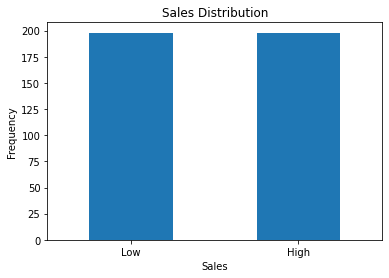

In [34]:
count_Taxable_Income = pd.value_counts(df_cleaned['Sales'], sort = True)

count_Taxable_Income.plot(kind = 'bar', rot=0)

plt.title("Sales Distribution")

LABELS = ["Low", "High"]

plt.xticks(range(2), LABELS)

plt.xlabel("Sales")

plt.ylabel("Frequency")

In [35]:
#Dividing the data
x=df_cleaned.iloc[:,1:]
y = df_cleaned.Sales

In [36]:
x.shape ,y.shape

((396, 11), (396,))

In [37]:
#normalize the data by MinMax scaller

In [38]:
from sklearn.preprocessing import MinMaxScaler

In [39]:
scalling = MinMaxScaler()
X= scalling.fit_transform(x)

In [40]:
X

array([[0.62244898, 0.52525253, 0.37931034, ..., 0.        , 1.        ,
        1.        ],
       [0.34693878, 0.27272727, 0.55172414, ..., 0.        , 1.        ,
        1.        ],
       [0.36734694, 0.14141414, 0.34482759, ..., 1.        , 1.        ,
        1.        ],
       ...,
       [0.86734694, 0.05050505, 0.4137931 , ..., 1.        , 1.        ,
        1.        ],
       [0.23469388, 0.58585859, 0.24137931, ..., 0.        , 1.        ,
        1.        ],
       [0.58163265, 0.16161616, 0.        , ..., 0.        , 1.        ,
        1.        ]])

# Split data into train-test split

In [41]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y , test_size=0.2, random_state=0)

In [42]:
Xtrain.shape, Xtest.shape

((316, 11), (80, 11))

# Building Random Forest Classifier

In [43]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100,max_depth=20,min_samples_split=40,criterion='entropy',max_features=3)
classifier.fit(Xtrain, ytrain)

RandomForestClassifier(criterion='entropy', max_depth=20, max_features=3,
                       min_samples_split=40)

In [44]:
classifier.score(Xtrain, ytrain)

0.8829113924050633

In [45]:
classifier.score(Xtest, ytest)

0.8125

In [46]:
pred = classifier.predict(Xtest)
pd.Series(pred).value_counts()    # predicted data

0    41
1    39
dtype: int64

In [47]:
pd.Series(ytest).value_counts()  # actual data


1    44
0    36
Name: Sales, dtype: int64

In [48]:
dataframe= pd.DataFrame({'ytest':ytest, 'predicted':pred})
dataframe

,ytest,predicted
300,0,0
319,1,1
318,1,1
65,0,0
59,0,0
...,...,...
140,0,0
142,0,0
307,1,1
146,1,1


In [49]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [50]:
acc = accuracy_score(ytest, pred) * 100
print("Accuracy =", acc)
confusion_matrix(ytest, pred)

Accuracy = 81.25


array([[31,  5],
       [10, 34]], dtype=int64)

In [51]:
from sklearn.metrics import classification_report
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.76      0.86      0.81        36
           1       0.87      0.77      0.82        44

    accuracy                           0.81        80
   macro avg       0.81      0.82      0.81        80
weighted avg       0.82      0.81      0.81        80



# Model Validation Methods

In [52]:
# 1.Evaluate using a train and a test set

model =RandomForestClassifier(n_estimators=100,max_depth=20,min_samples_split=40,criterion='entropy',max_features=3)
model.fit(Xtrain,ytrain)
result = model.score(Xtest,ytest)
result*100

78.75

In [53]:
# 2.Evaluate using Cross Validation

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


num_folds =10
seed = 100

kfold = KFold(n_splits=num_folds, random_state=100,shuffle=True)
model =RandomForestClassifier(n_estimators=100,max_depth=20,min_samples_split=40,criterion='entropy',max_features=3)
results = cross_val_score(model, X,y, cv=kfold)
results.mean()*100.0

80.57692307692308

In [54]:
# Evaluate using Leave One Out Cross Validation

from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score



loocv = LeaveOneOut()
model =RandomForestClassifier(n_estimators=100,max_depth=20,min_samples_split=40,criterion='entropy',max_features=3)
results = cross_val_score(model, X,y, cv=loocv)

In [55]:
result*100

78.75